#### 농어(perch)의 길이 데이터를 통해 농어 무게 예측하는 모델 만들기

* K-NN(K-Nearest Neighbor) Regression (K-최근접 이웃 회귀)
    * Limitations
* **Linear Regression** (선형회귀): 널리 사용되는 대표적인 회귀 알고리즘
    * dependent variable (y), 1개 이상의 independent variable (x)의 선형 상관관계를 모델링하는 기법
    * Simple Linear Regression (단순 선형 회귀): 1 independent variable (x)
        * y = Wx + b (y = dv, W = weight, iv = x, b = bias)
        * 적절한 weight (가중치), bias (편향) 값을 찾는 것
        * 직선의 그래프
    * Multiple Linear Regression (다중 선형 회귀): over 1 independent variables (x)
        * y = W1x1 + W2x2 + ... +Wnxn + b
        * 여러 독립 변수에 영향을 받음
        * 평면의 그래프

## K-NN regression: restrictions

### Data on Perch
- 농어 (perch)의 길이 데이터를 통해 농어 무게 예측하는 모델 만들기

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달


In [2]:
from sklearn.model_selection import train_test_split
    # 훈련 데이터와 테스트 데이터 분리하기
    
train_data, test_data, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)
    # 농어 길이 데이터로 무게를 예측할거니까 X = 길이, target = 무게

train_data = train_data.reshape(-1,1) # 2차원 배열로 변경하기
test_data = test_data.reshape(-1,1) # 2차원 배열로 변경하기

In [3]:
from sklearn.neighbors import KNeighborsRegressor
    # scikit-learn 에서 K-NN regression - import
    
knr = KNeighborsRegressor(n_neighbors = 3) # 객체 지정, 이웃의 수 설정
knr.fit(train_data, train_target) # 훈련 세트를 모델 객체에 전달해 모델 학습시키기

KNeighborsRegressor(n_neighbors=3)

In [4]:
knr.predict([[50]]) # 길이가 50인 농어의 몸무게를 예측하기 output = 1033

array([1033.33333333])

distances:  [[6. 7. 7.]]
indexes:  [[34  8 14]]


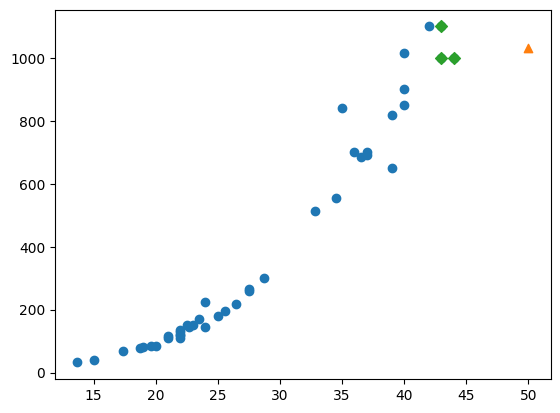

In [5]:
distances, indexes = knr.kneighbors([[50]])
print('distances: ', distances)
print('indexes: ', indexes)

import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
plt.scatter(50, 1033, marker = '^')
plt.scatter(train_data[indexes], train_target[indexes], marker = 'D')
plt.show()

In [6]:
np.mean(train_target[indexes]) # 가까운 이웃에 해당하는 물고기들의 평균 몸무게(target)

1033.3333333333333

In [7]:
knr.predict([[100]]) # 길이 100인 물고기의 예측되는 몸무게 = 1033

array([1033.33333333])

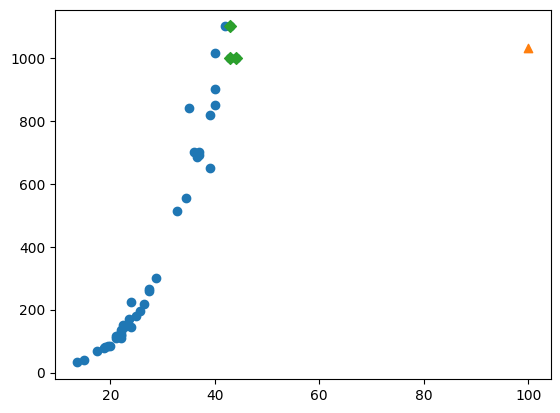

In [8]:
# 100 cm 농어의 이웃을 구한다.

distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_data, train_target)
plt.scatter(100, 1033, marker = '^')
plt.scatter(train_data[indexes], train_target[indexes], marker = 'D')
plt.show()

### K-NN 회귀의 약점!
- 가장 가까운 거리에 있는 데이터와 같은 범주에 있다는 가정 하에 예측을 하기 때문에
- 100 cm의 농어도 가장 가까운 거리에 있는 데이터 (약 40 - 50 cm)의 몸무게와 동일한 몸무게로 예측할 것이고, 농어가 아무리 커도 무게는 늘어나지 않을 것이다. 

##### 이런 오류를 피하기 위해 변수가 1개 일 때에는 단순 선형 회귀를 쓸 수 있다.

## Linear Regression

- 하나의 독립변수 사용: 직선의 그래프 y = ax + b 의 형태를 가진다.
- a 는 lr 객체의 coef_ 변수에, b는 lr 객체의 intercept_ 변수에 저장된다.

In [9]:
from sklearn.linear_model import LinearRegression
    # 선형 회귀 사용을 위해 sklearn 에서 LinearRegression 호출

lr = LinearRegression() # 객체 정의
lr.fit(train_data, train_target) # 훈련 세트로 모델 학습시키기
print(lr.predict([[100]])) # 길이가 100인 농어의 몸무게를 예측하기

[3192.69585141]


In [10]:
# K-NN 회귀를 이용했을 때 길이가 아무리 커져도 무게는 늘어나지 않는 결과를 봤었다.
# output = 3192 K-NN 회귀를 이용했을 때보다 약 3배 이상 무거운 무게가 나왔다.

print(lr.coef_, lr.intercept_)
    # y = (lr.coef_)x + (lrr.intercept_)의 직선이 구해졌다.

[39.01714496] -709.0186449535477


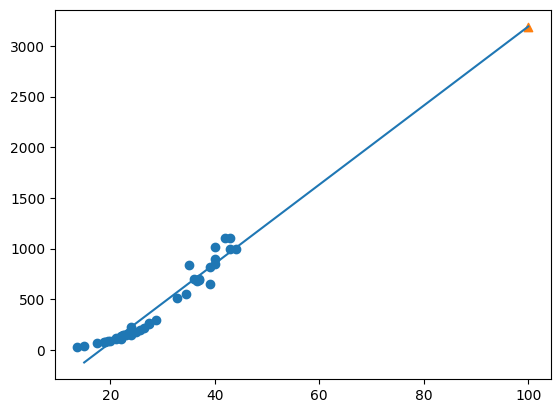

In [11]:
# 직선을 그래프로 그려보자

plt.scatter(train_data, train_target)
plt.plot([15, 100], [15 * lr.coef_ + lr.intercept_, 100 * lr.coef_ + lr.intercept_])
        # 구한 직선의 방정식을 y = f(x)라고 한다면, 직선은 두 점 (15, f(15))와 (100, f(100))을 연결하는 직선일 것.
plt.scatter(100, 3192, marker = '^')
plt.show()

In [12]:
print(lr.score(train_data, train_target)) # 모델 학습이 잘 되었는지 훈련 세트와 테스트 세트를 전달해 정확도 점수를 산출.
print(lr.score(test_data, test_target))

0.939846333997604
0.8247503123313558


- 모델 학습이 잘 되었는지 훈련 세트와 테스트 세트를 전달해 정확도 점수를 산출.
```print(lr.score(train_data, train_target)) ``` <br>
0.939846333997604 <br>
```print(lr.score(test_data, test_target))```<br>
0.8247503123313558 <br>

- 두 세트에 대한 훈련 모델의 R2 점수에 차이가 있을 뿐더러, 훈련 세트의 점수도 그렇게 높지 않다.
- 이유: 실제 농어의 데이터는 직선보다는 곡선에 가깝기 때문.

## Polynomial Regression (다향 회귀)
- 다항식을 사용한 선형 회귀
- 다중 회귀는 2개 이상의 독립 변수가 존재하는 형태
- **다항 회귀**는 1개의 독립 변수를 이용해 차수를 높이는 형태
### 최적의 곡선을 찾기
- 2차 방정식 구한다.
    - 길이를 제곱한 항 추가
    - ```np.column_stack(([a, b]))``` : 두 개의 1차원 배열을 칼럼으로 세로(열 방향)로 붙여서 2차원 배열 만드는 넘파이 기능

In [13]:
train_poly = np.column_stack((train_data**2, train_data)) # (1열 = 길이의 제곱, 2열 = 길이)의 2차원 배열을 train_poly에 assign
test_poly = np.column_stack((test_data**2, test_data)) # (1열 = 길이의 제곱, 2열 = 길이)의 2차원 배열을 test_poly에 assign

In [14]:
# 선형 회귀 모델 재학습
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)
    # y = (lr.coef_)x**2 + (lr.intercept_)의 곡선을 구한다.

[  1.01433211 -21.55792498] 116.05021078278259


In [15]:
print(lr.predict([[100**2, 100]])) # 길이 100의 농어 무게를 예측해보자.
        # 훈련할 때 (길이의 제곱, 길이)를 넣고 훈련했으니 예측할 때에도 길이의 제곱 값을 함께 넣어주어야 한다!

[8103.57880667]


In [16]:
# output = 8103
# 단순 선형 회귀를 사용했을 때 나온 값, 약 3192보다 더 높은 값을 예측했다.

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 모델이 적절하게 훈련이 되었는지 확인

0.9706807451768623
0.9775935108325121


```print(lr.score(train_poly, train_target)) ``` <br>
0.9706807451768623 <br>
```print(lr.score(test_poly, test_target))```<br>
0.9775935108325121 <br>

- 약간의 과소적합이 남아있지만, 점수가 높아진 것 확인 할 수 있음.
- 훈련 세트 점수가 더 높으면 overfitting, 테스트 세트 점수가 더 높으면 underfitting

In [17]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


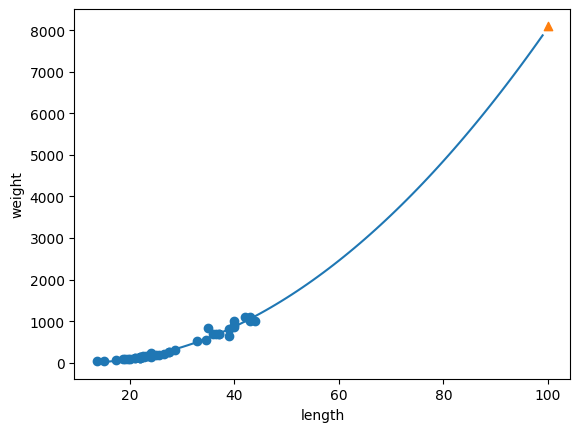

In [18]:
# 훈련이 잘 되었는지 그래프로 시각화해서 보자

point = np.arange(15 ,100) # 구간별 직선을 그리기 위해 15에서 99 까지 정수 배열을 만든다
plt.scatter(train_data, train_target)
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05) # 15에서 99까지 2차 방정식 그래프를 그린다.
                # (lr.coef_) * point**2 - (lr.coef_) * point + (lr.intercept_)
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter([100], [8103], marker = '^')
# plt.scatter(100, 8103, marker = '^')
plt.show()

선형 회귀보다 r^2 값이 더 높게 나왔으므로 다항 회귀 모델이 더 적합. 하지만 여전히 과소적합 문제는 해결되지 않았다.